In [1]:

# Dependencies
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
logos = nfl.import_team_desc()
logos.head()
logos = logos[['team_abbr', 'team_logo_espn']]
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
    os.makedirs("logos")

In [3]:
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])
  
data = {'Team' : team_abbr, 'Logo Path' : logo_paths}
logo_df = pd.DataFrame(data)

In [4]:
df = nfl.import_pbp_data([2023])
total_yards = df[['posteam', 'rushing_yards', 'passing_yards']]
total_yards = total_yards.groupby('posteam').sum()
total_yards = total_yards.reset_index()
total_yards = total_yards.rename(columns={'posteam' : 'Team'})
total_yards

2023 done.
Downcasting floats.


,Team,rushing_yards,passing_yards
0,ARI,1845.0,2706.0
1,ATL,1947.0,3277.0
2,BAL,2293.0,3143.0
3,BUF,1957.0,3778.0
4,CAR,1581.0,3039.0
5,CHI,1882.0,2835.0
6,CIN,1240.0,3884.0
7,CLE,1786.0,3536.0
8,DAL,1631.0,3753.0
9,DEN,1578.0,2832.0


In [5]:
df2 = pd.merge(total_yards, logo_df)
df2

,Team,rushing_yards,passing_yards,Logo Path
0,ARI,1845.0,2706.0,logos/ARI.tif
1,ATL,1947.0,3277.0,logos/ATL.tif
2,BAL,2293.0,3143.0,logos/BAL.tif
3,BUF,1957.0,3778.0,logos/BUF.tif
4,CAR,1581.0,3039.0,logos/CAR.tif
5,CHI,1882.0,2835.0,logos/CHI.tif
6,CIN,1240.0,3884.0,logos/CIN.tif
7,CLE,1786.0,3536.0,logos/CLE.tif
8,DAL,1631.0,3753.0,logos/DAL.tif
9,DEN,1578.0,2832.0,logos/DEN.tif


In [6]:
def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

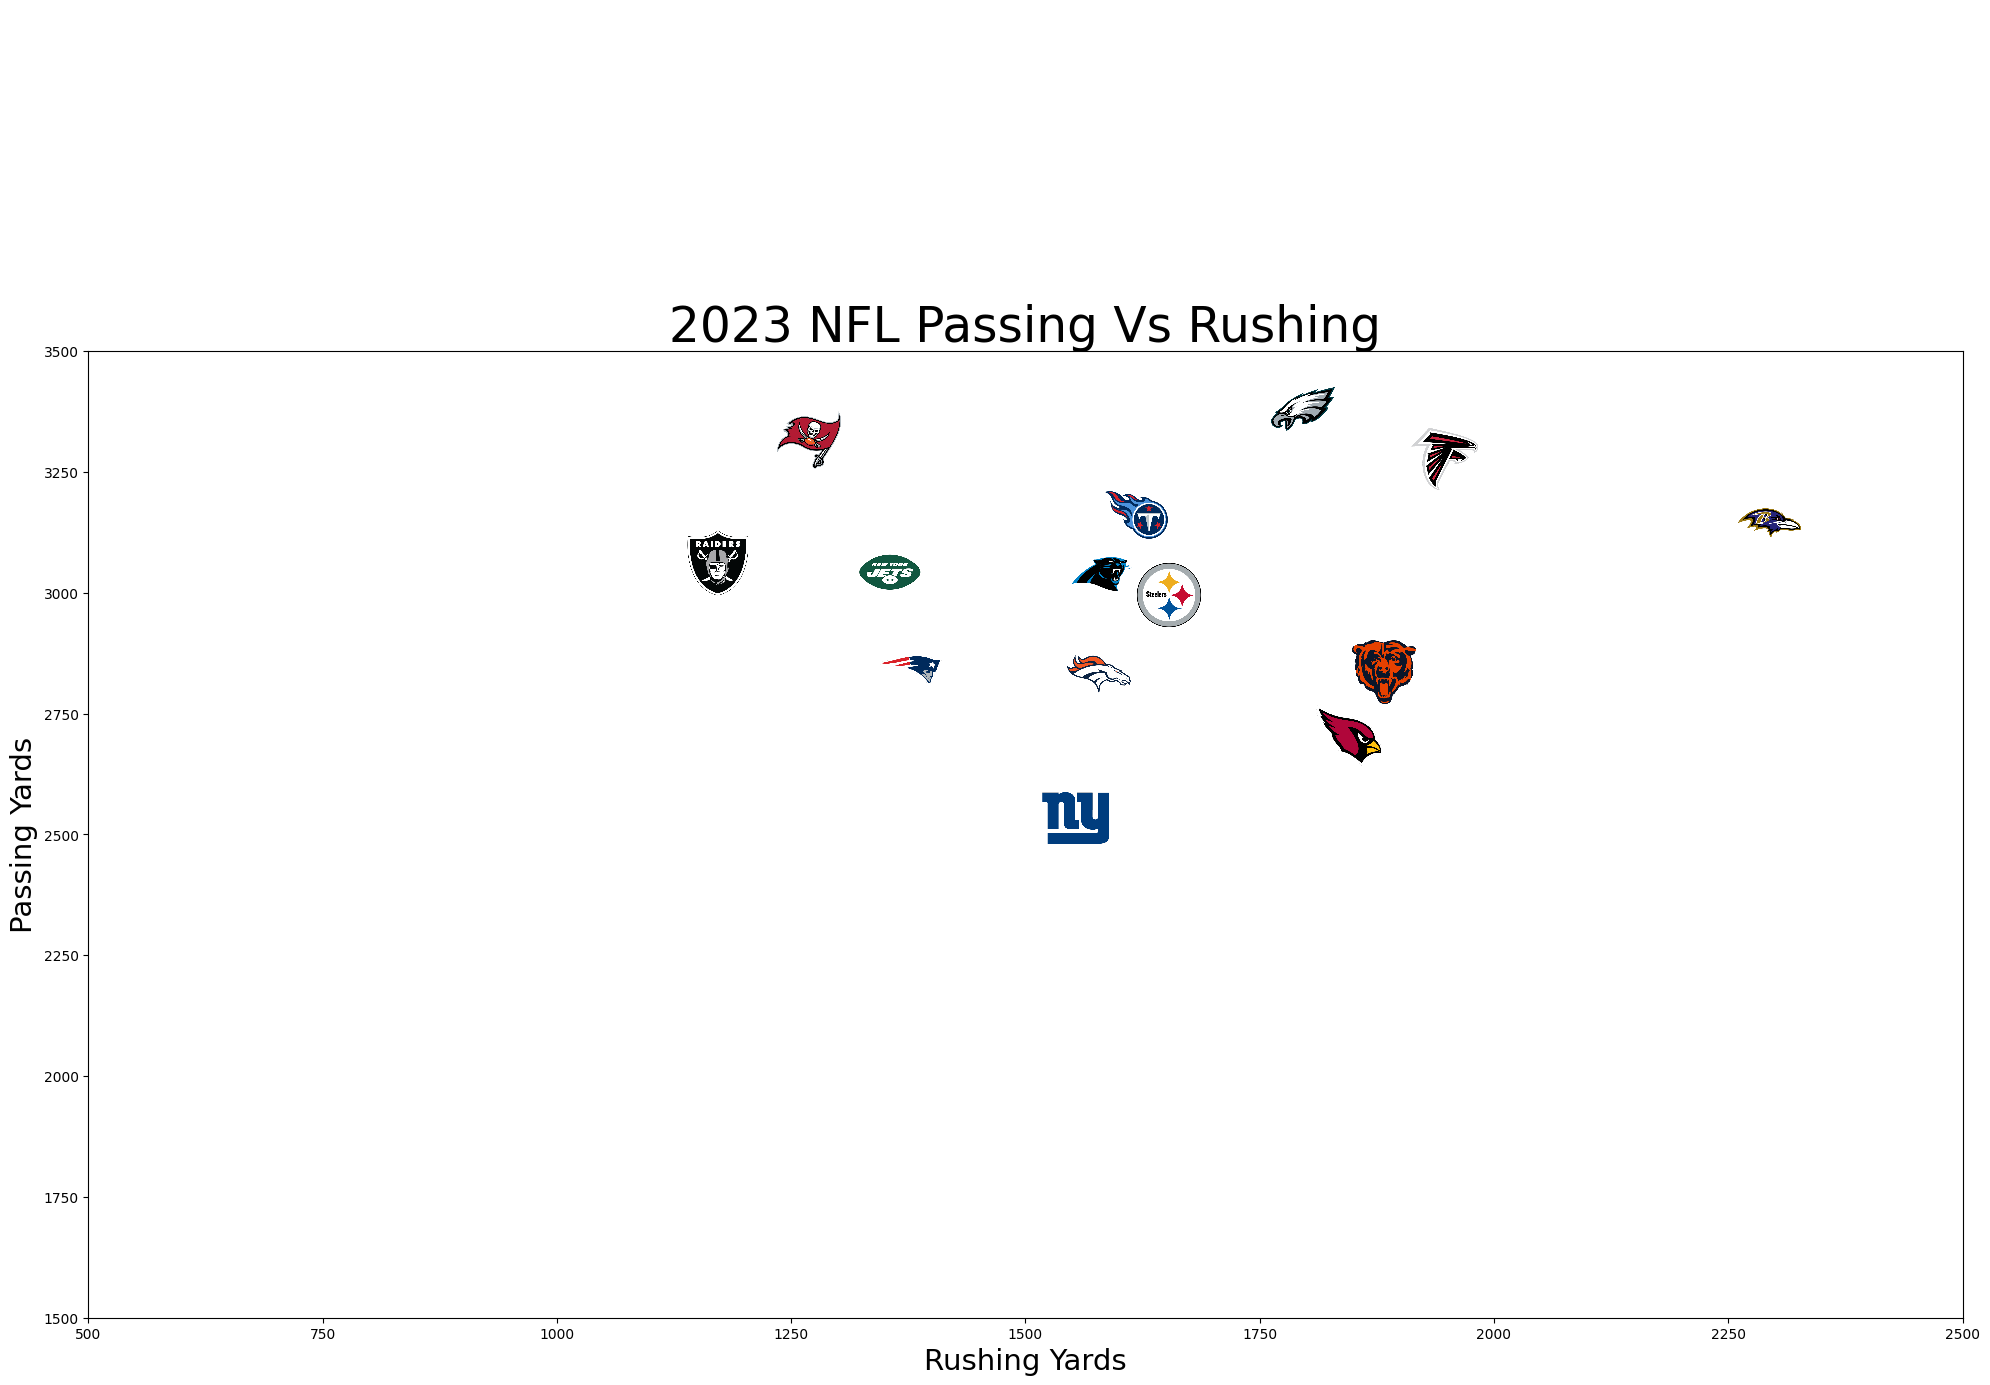

In [7]:
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

x = df2['rushing_yards']
y = df2['passing_yards']

paths = df2['Logo Path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.xlim(500, 2500)
plt.ylim(1500, 3500)
plt.title("2023 NFL Passing Vs Rushing", fontdict={'fontsize':35});
plt.xlabel("Rushing Yards", fontdict={'fontsize':21});
plt.ylabel("Passing Yards", fontdict={'fontsize':21});
plt.savefig("RushingvsPassingYards")